In [1]:
!pip install PyWavelets

In [31]:
LL.shape

(258, 258)

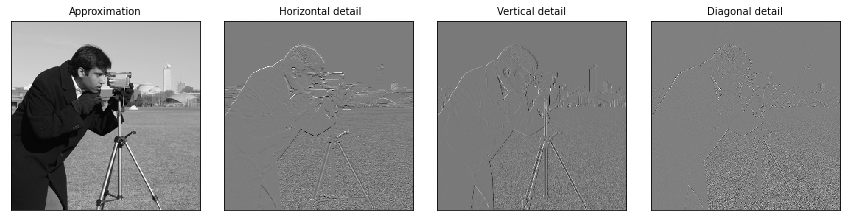

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original[150:214,250:314], 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

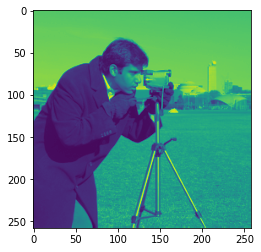

In [4]:
plt.imshow(LL)

In [6]:
!pip install tensorflow-wavelets

In [28]:
original_tf =  tf.expand_dims(original[150:214,250:314], axis=2)
original_tf =   tf.expand_dims(original_tf, axis=0)

In [29]:
original_tf.shape

TensorShape([1, 64, 64, 1])

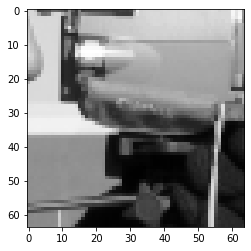

In [27]:
plt.imshow(original[150:214,250:314],cmap ="gray")

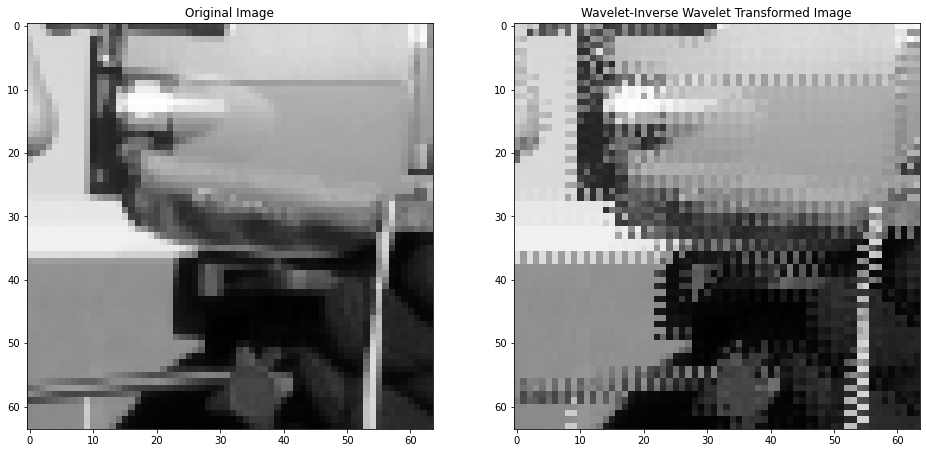

In [30]:
import tensorflow as tf
import tensorflow_wavelets.Layers.DWT as DWT
import tensorflow_wavelets.Layers.DTCWT as DTCWT
import tensorflow_wavelets.Layers.DMWT as DMWT

dwt = DWT.DWT(wavelet_name="haar",concat=0)(tf.dtypes.cast(original_tf, tf.float32))
idwt = DWT.IDWT(wavelet_name="haar",splited=1)(tf.dtypes.cast(dwt, tf.float32))
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.imshow(original_tf[0,:,:,:],cmap = 'gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(idwt[0,:,:,:],cmap = 'gray')
plt.title('Wavelet-Inverse Wavelet Transformed Image')
_ = plt.show()
#plt.savefig('Wavelet-Inverse Wavelet.jpg')

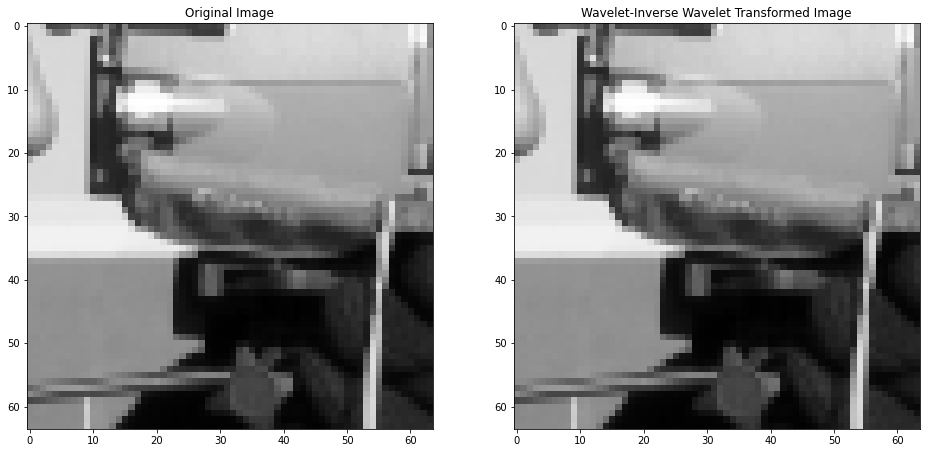

In [33]:
coeffs2 = pywt.dwt2(original[150:214,250:314], 'bior1.3')
idwt = pywt.idwt2(coeffs2, 'bior1.3')
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.imshow(original[150:214,250:314],cmap = 'gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(idwt,cmap = 'gray')
plt.title('Wavelet-Inverse Wavelet Transformed Image')
_ = plt.show()